# 4.2 - Más modelos USL

In [1]:
import pylab as plt
%matplotlib inline

from sklearn.datasets import make_moons

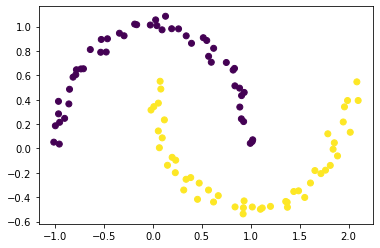

In [25]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan=DBSCAN()

dbscan.fit(moons[0])

DBSCAN()

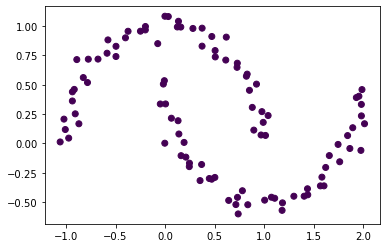

In [5]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=dbscan.labels_);

In [6]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
dbscan=DBSCAN(eps=0.25, min_samples=3)

dbscan.fit(moons[0])

DBSCAN(eps=0.25, min_samples=3)

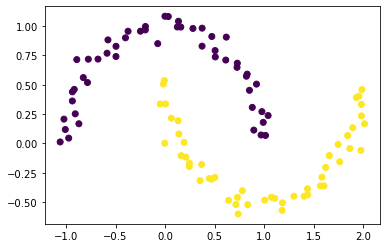

In [15]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=dbscan.labels_);

In [17]:
dbscan.labels_

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [ ]:
#!pip install hdbscan

In [18]:
from hdbscan import HDBSCAN

In [19]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

In [26]:
hdbscan.fit(moons[0])

HDBSCAN(gen_min_span_tree=True)

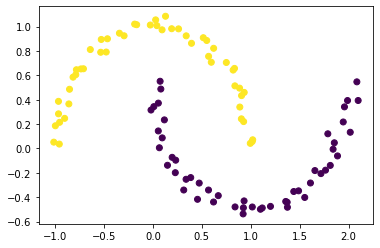

In [27]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.labels_);

In [28]:
hdbscan.labels_

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

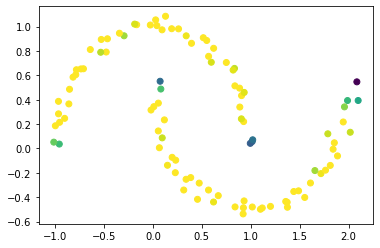

In [29]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.probabilities_);

In [30]:
hdbscan.probabilities_

array([0.52586267, 1.        , 1.        , 0.95536217, 0.96024604,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.97037001, 1.        , 0.99291709, 1.        , 0.84950336,
       1.        , 1.        , 1.        , 0.68008301, 1.        ,
       0.689048  , 1.        , 1.        , 0.88874951, 1.        ,
       0.97059236, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66617161, 1.        , 1.        , 1.        , 0.98850691,
       1.        , 1.        , 1.        , 0.98856686, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.8080808 ,
       1.        , 1.        , 0.97820673, 1.        , 0.84194725,
       1.        , 1.        , 0.93232398, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.96024604, 1.     

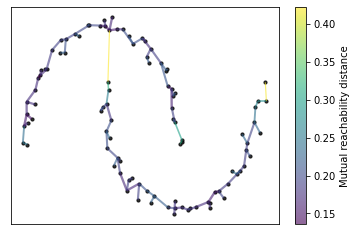

In [31]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

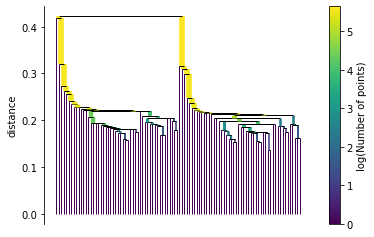

In [32]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

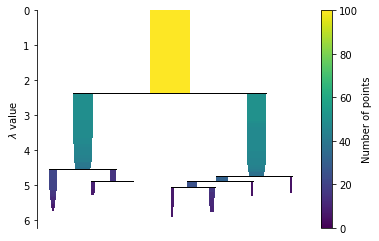

In [33]:
hdbscan.condensed_tree_.plot();

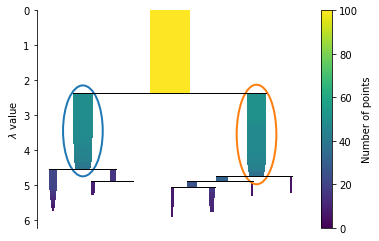

In [34]:
import seaborn as sns

hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [35]:
from sklearn.cluster import OPTICS

In [36]:
opt=OPTICS(max_eps=1, eps=0.5, min_samples=5)

opt.fit(moons[0])

OPTICS(eps=0.5, max_eps=1)

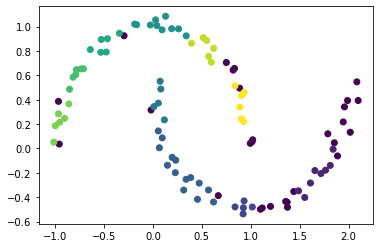

In [37]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=opt.labels_);

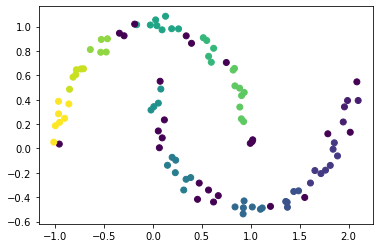

In [41]:
opt=OPTICS(max_eps=0.6, eps=0.2, min_samples=4)

opt.fit(moons[0])

plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

In [42]:
from sklearn.mixture import GaussianMixture as GM

In [43]:
gm=GM(n_components=2, covariance_type='full')

gm.fit(moons[0])

gm.means_

array([[ 1.12688427, -0.12504278],
       [-0.13453013,  0.63780651]])

In [44]:
gm.covariances_

array([[[0.36418085, 0.05131807],
        [0.05131807, 0.09781358]],

       [[0.35200612, 0.05887097],
        [0.05887097, 0.09378108]]])

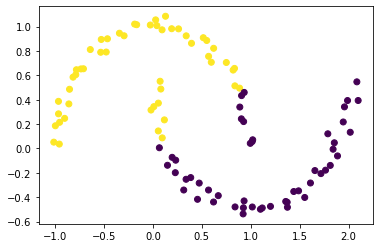

In [45]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict(moons[0]));

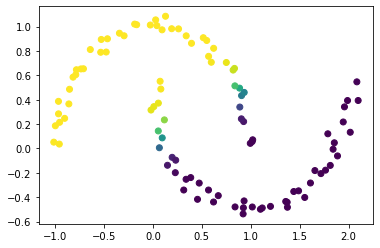

In [46]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict_proba(moons[0])[:,1]);

In [47]:
from sklearn.datasets import make_classification as mc

In [50]:
X=mc(n_features=2, 
     n_redundant=0, 
     n_informative=2, 
     n_clusters_per_class=1)

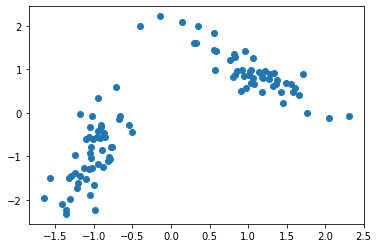

In [51]:
plt.scatter(X[0][:,0], X[0][:,1]);

In [52]:
gm=GM(n_components=2, covariance_type='full')

gm.fit(X[0])

GaussianMixture(n_components=2)

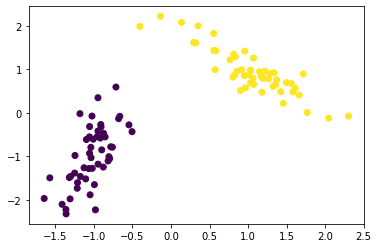

In [53]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

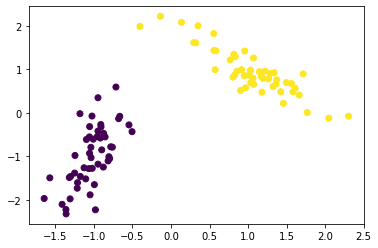

In [55]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:, 1]);

![](data/usl_models.png)

![usl_models](images/usl_models.png)